<a href="https://colab.research.google.com/github/satvikpendem/ZeroToMasteryPyTorchForDeepLearning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
  
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
        
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

In [4]:
!nvidia-smi
device = "cpu"

if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"

# device = "cuda"
device

Tue Oct 18 17:01:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.25       Driver Version: 522.25       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
|  0%   39C    P8    31W / 340W |   8982MiB / 10240MiB |     41%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'cuda'

# Linear Regression


In [5]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create learning model
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [6]:
# Train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):

    fig = plt.figure(figsize=(10, 7))
    fig.patch.set_alpha(1.0)

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # modulus = len(predictions) // 10
        # for i, p in enumerate(predictions):
        #   if i % modulus == 0:
        # plt.scatter(test_data, p, c = np.random.rand(len(test_data), 3), s = 4, label = f"Predictions {p}")
        plt.scatter(test_data, predictions, c="r", s=4, label=f"Predictions")

    plt.legend(prop={"size": 14})

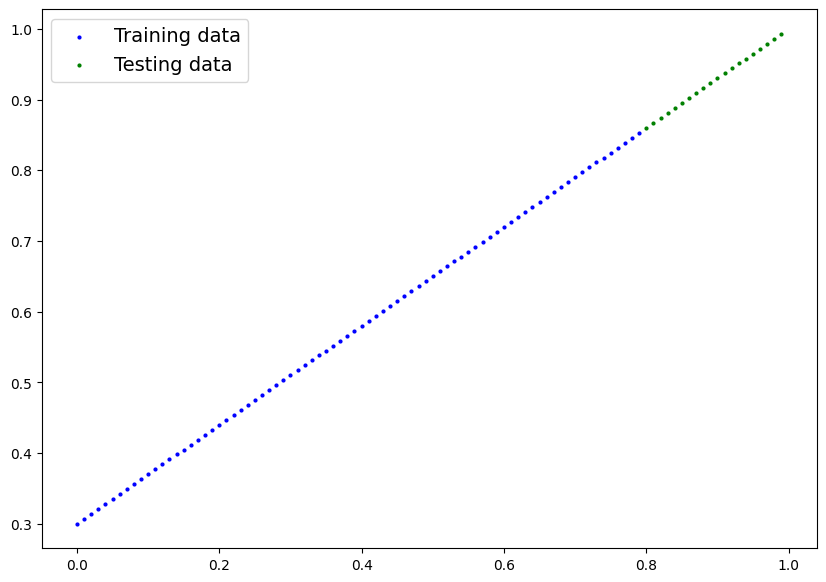

In [8]:
plot_predictions()

In [9]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [10]:
# Initialize with random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))

print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


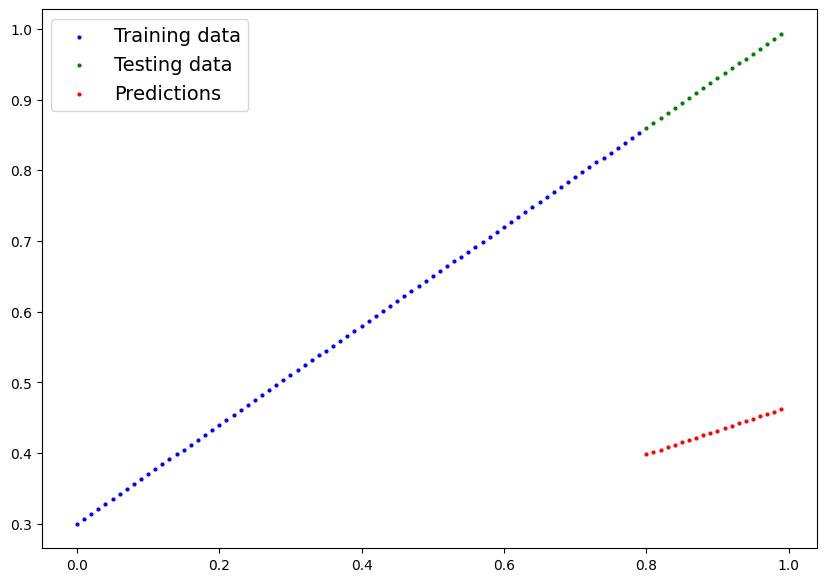

In [11]:
# Inference with no training done
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [12]:
# Set up loss function
loss_fn = nn.MSELoss()

# Set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [13]:
# Train
epochs = 10000

losses = []

for epoch in range(epochs):

  # Set model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  losses.append(loss.detach().numpy())

  # Optimizer zero grad
  # Make optimizer's gradient to be zero so as to not accumulate gradient
  # in each loop
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Perform gradient descent
  optimizer.step()

  model_0.eval()

  

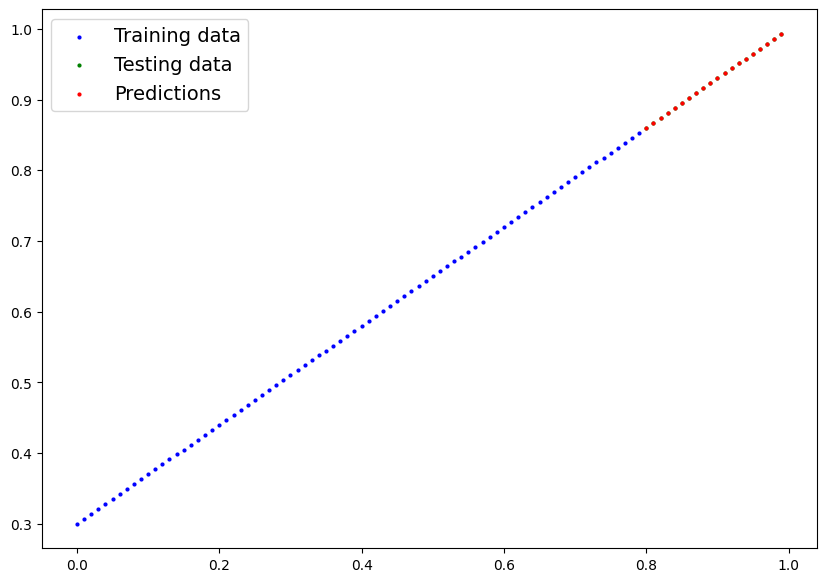

In [14]:
# Inference after training
with torch.inference_mode():
  predictions = model_0(X_test)

plot_predictions(predictions = predictions)


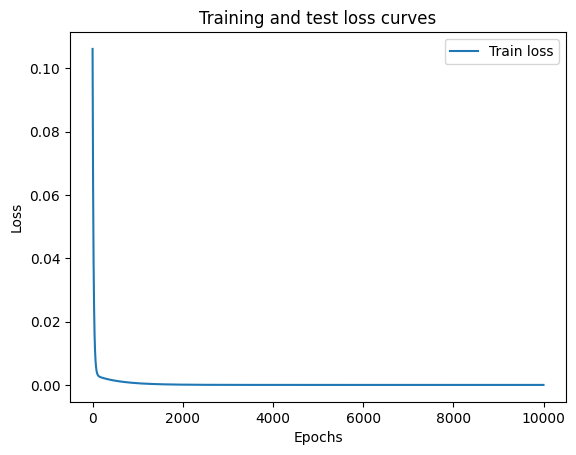

In [15]:
# Plot the loss curves
fig = plt.figure()
fig.patch.set_alpha(1.0)

plt.plot(range(0, epochs), losses, label="Train loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
# Saving models

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

MODEL_NAME = "linear_regression_model.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [19]:
# Loading models

model = torch.load(MODEL_SAVE_PATH)

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(model)

<All keys matched successfully>

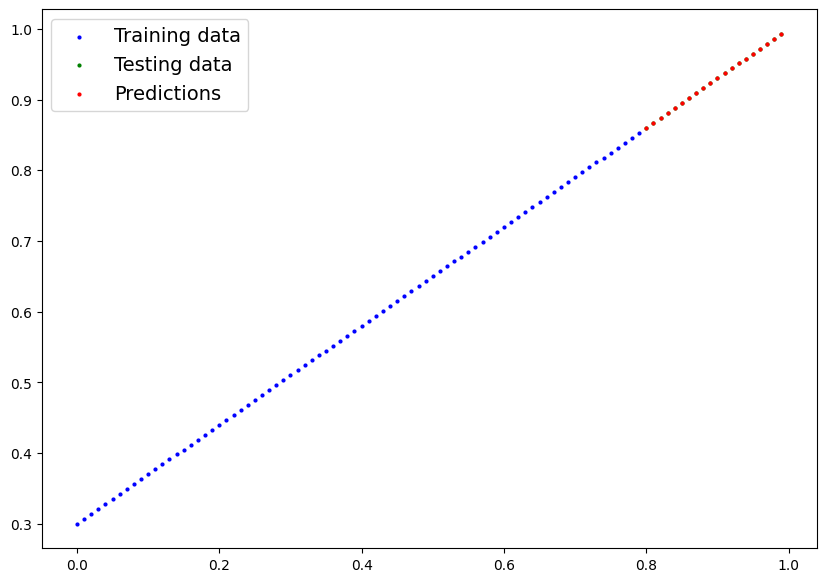

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
  predictions = loaded_model_0(X_test)

plot_predictions(predictions = predictions)